In [185]:
import pandas as pd
df = pd.read_csv('csv files/IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# 1 Reading the data 

In [186]:
# take a sample of 10000 rows to make processing faster and get imbalance data

# 9000 positives
df_positive = df[df['sentiment'] =='positive'][:9000]

# 1000 negatives
df_negative = df[df['sentiment'] =='negative'][:1000]


In [187]:
# imbalanced (imb) data variable
'''
imbalanced data because number of oberservations per class is not equally distributed (9000 positive, 1000 negative)
'''
df_imb = pd.concat([df_positive, df_negative])

In [188]:
df_imb.value_counts('sentiment')

sentiment
positive    9000
negative    1000
Name: count, dtype: int64

# 2 Different Ways to Deal With Imbalanced Data

<Axes: xlabel='sentiment'>

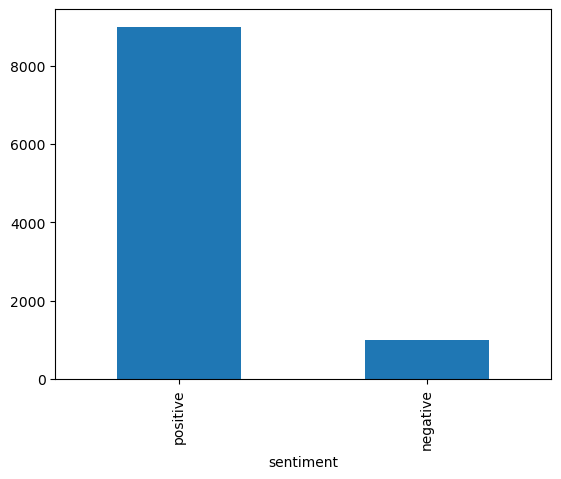

In [189]:
# make a barplot to show how data is distributed
df_imb.value_counts('sentiment').plot(kind='bar', )

## 2.1 Balancing data ith .sample()

In [190]:
# get length of negative reviews
len_neg = len(df_imb[df_imb['sentiment'] == 'negative'])

# sample positive reviews with same number of negative reviews
df_positive = df_imb[df_imb['sentiment'] == 'positive'].sample(n=len_neg)

# get negative reviews dataframe
df_negative = df_imb[df_imb['sentiment'] == 'negative']

In [191]:
df_bal = pd.concat([df_positive, df_negative])
df_bal.reset_index(drop=True, inplace=True)
df_bal

,review,sentiment
0,Barman directed Any Way the Wind Blows as he w...,positive
1,This silly movie is really fun for the younger...,positive
2,I watched fantabulosa! because over the last f...,positive
3,Most who go to this movie will have an idea wh...,positive
4,This movie contains personalities that so deli...,positive
...,...,...
1995,Stranded in Space (1972) MST3K version - a ver...,negative
1996,"I happened to catch this supposed ""horror"" fli...",negative
1997,waste of 1h45 this nasty little film is one to...,negative
1998,Warning: This could spoil your movie. Watch it...,negative


## 2.2 Balancing data with RandomUnderSampler or RandomOverSampler

In [192]:
# !pip install imblearn
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 0)

'''
rus.fit_resample( dataframe[['col']], dataframe['col2'] )
'''
# will return 2 values so assign both like so: varaible1, variable2 = rus.fi...
df_bal, df_bal['sentiment'] = rus.fit_resample(df_imb[['review']], df_imb['sentiment'])
df_bal.reset_index(drop=True, inplace=True)
df_bal

,review,sentiment
0,Basically there's a family where a little boy ...,negative
1,"This show was an amazing, fresh & innovative i...",negative
2,Encouraged by the positive comments about this...,negative
3,Phil the Alien is one of those quirky films wh...,negative
4,I saw this movie when I was about 12 when it c...,negative
...,...,...
1995,Knute Rockne led an extraordinary life and his...,positive
1996,At the height of the 'Celebrity Big Brother' r...,positive
1997,This is another of Robert Altman's underrated ...,positive
1998,This movie won a special award at Cannes for i...,positive


# 3 Splitting Data into Train and Test sets

In [193]:
# import train_test_split
from sklearn.model_selection import train_test_split

train,test = train_test_split(df_bal, test_size=.33, random_state=42)

In [194]:
# create train and test dataframes
test

,review,sentiment
1860,Refreshing `lost' gem! Featuring effective dia...,positive
353,Never saw the original movie in the series...I...,negative
1333,"Once upon a time, in Sweden, there was a poor ...",positive
905,"At the beginning of the film, you might double...",negative
1289,Another Spanish movie about the 1936 Civil War...,positive
...,...,...
118,"I have seen most, if not all of the Laurel & H...",negative
1249,D.W. Griffith could have made any film he want...,positive
1993,"Cardiff, Wales. A bunch of 5 mates are deeply ...",positive
522,I rented this movie with my friend for a good ...,negative


In [195]:
# setup indep. and dep. variables
train_x, train_y = train['review'], train['sentiment'] 
test_x, test_y = test['review'], test['sentiment'] 

In [196]:
train_x
test_x

1860    Refreshing `lost' gem! Featuring effective dia...
353     Never saw the original movie in the series...I...
1333    Once upon a time, in Sweden, there was a poor ...
905     At the beginning of the film, you might double...
1289    Another Spanish movie about the 1936 Civil War...
                              ...                        
118     I have seen most, if not all of the Laurel & H...
1249    D.W. Griffith could have made any film he want...
1993    Cardiff, Wales. A bunch of 5 mates are deeply ...
522     I rented this movie with my friend for a good ...
513     Jim Carrey is one of the funniest and most gif...
Name: review, Length: 660, dtype: object

# 4 Text Representation (Bag of Words)

The **Bag of Words (BoW)** model is a simple and widely used technique in Natural Language Processing for text representation. It converts text documents into fixed-length vectors by counting how often each word appears in a document, disregarding grammar and word order but keeping multiplicity. The idea is to create a vocabulary of all unique words across the corpus and represent each document as a vector indicating the frequency of each word.

For example, given a corpus:

- Document 1: "I love cats"
- Document 2: "I love dogs"

The BoW representation (using the vocabulary: ["I", "love", "cats", "dogs"]) would be:

-        ["I", "love", "cats", "dogs"]
- Doc 1: [1, 1, 1, 0]
- Doc 2: [1, 1, 0, 1]

Each entry represents the count of the corresponding word in the document. While BoW is easy to implement and useful for many tasks, it does not capture the meaning, order, or context of words.


## 4.1 Count Vectorizer

In [197]:
from sklearn.feature_extraction.text import CountVectorizer

text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]

df_cv = pd.DataFrame({'review':['review1', 'review2'], 'text':text})
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(df_cv['text'])

In [198]:
df_dtm = pd.DataFrame(cv_matrix.toarray(), index=df_cv['review'].values, 
                      columns=cv.get_feature_names_out())
df_dtm

,code,hate,java,love,python,writing
review1,2,0,0,2,2,1
review2,2,2,2,0,0,1


## 4.2 Term Frequency-Inverse Document Frequency (TF-IDF)

**TF-IDF (Term Frequency–Inverse Document Frequency)** is a statistical measure used in Natural Language Processing (NLP) and Information Retrieval to evaluate how important a word is to a particular document in a collection. The intuition behind TF-IDF is that terms that occur frequently in a document are important (TF), but if they appear in many documents, they’re probably less informative (IDF). By combining these two ideas, TF-IDF highlights terms that are frequent in a document but rare across the collection.
1. **Term Frequency (TF)**  
   Measures how often a term appears in a single document:

   $$
   \mathrm{TF}(t, d) = \frac{f_{t,d}}{\sum_k f_{k,d}}
   $$
   where:
   - $ f_{t,d} $ = number of times term $ t $ appears in document $ d $  
   - $ \sum_k f_{k,d} $ = total number of terms in document $ d $
2. **Inverse Document Frequency (IDF)**  
   Measures how rare or informative a term is across all documents:
   $$
   \mathrm{IDF}(t) = \log\left( \frac{N+1}{1 + df(t)} \right)+1
   $$
   where:
   - $  N  $ = total number of documents in the corpus
   - $df(t) $ = number of documents containing the term \( t \)
   - The "$+1$" in the denominator is a smoothing term to avoid division by zero.
3. **TF-IDF Score**
   The final score is the product of TF and IDF:
   $$
   \mathrm{TF\text{-}IDF}(t, d) = \mathrm{TF}(t, d) \times \mathrm{IDF}(t)
   $$

In [199]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]

df_tfidf = pd.DataFrame({'review':['review1', 'review2'], 'text':text})
tfidf = TfidfVectorizer(stop_words='english', norm=None)
tfidf_matrix = tfidf.fit_transform(df_tfidf['text'])

pd.DataFrame(tfidf_matrix.toarray(), index=df_tfidf['review'].values,
                      columns=tfidf.get_feature_names_out())

,code,hate,java,love,python,writing
review1,2.0,0.00000,0.00000,2.81093,2.81093,1.0
review2,2.0,2.81093,2.81093,0.00000,0.00000,1.0


# 5 Turning our text data into numerical vectors

In [214]:
tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
# train_x_vector

In [213]:
test_x_vector = tfidf.transform(test_x)
# test_x_vector

In [215]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector, 
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names_out())

,00,000,007,01pm,02,04,08,10,100,1000,...,zooming,zooms,zues,zzzzzzzzzzzzzzzzzz,æon,élan,émigré,ísnt,ïn,ünfaithful
81,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380,0,0,0,0,0,0,0,0.042791,0,0,...,0,0,0,0,0,0,0,0,0,0
1029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 6 Machine Learning Algorithms

### Supervised Learning
Supervised learning uses **labeled data** where the model learns to predict an output from input features.
- **Regression:** Predicts continuous numerical values.  
  *Example:* Predicting house prices based on size and location.

- **Classification:** Predicts discrete categories or classes.  
  *Example:* Email spam detection (spam or not spam), or image recognition (cat vs dog).

#### Popular Supervised Algorithms
- Support Vector Machines (SVM)  
- Decision Trees  
- Naive Bayes  
- Logistic Regression  
### Unsupervised Learning
Unsupervised learning works with **unlabeled data** and aims to find hidden patterns or groupings.

- Common tasks include clustering (grouping similar data points) and dimensionality reduction (simplifying data while preserving structure).

*Example:* Customer segmentation in marketing based on purchasing behavior without predefined groups.

**Summary:**  
Supervised learning predicts known outputs from labeled data (regression for continuous, classification for categories), while unsupervised learning finds structure in unlabeled data.


In [235]:
from sklearn.metrics import accuracy_score, classification_report

## 6.1 Support Vector Machines (SVM)

Support Vector Machines (SVM) are powerful supervised learning models primarily used for classification tasks, though they can also be applied to regression. The main idea behind SVM is to find the **optimal hyperplane** that separates data points of different classes with the **maximum margin** — the largest possible distance between the hyperplane and the nearest points from each class (called support vectors).

Overall, SVMs provide a flexible and powerful method for classification by focusing on the most informative data points and using kernels to handle complex patterns.

In [217]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [226]:
'''
With the tfidf that was initiated before, I'm transforming the 
text as a vector and with the SVC I'm predicting the sentiment 
based on the vector "A good movie"
'''
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['Execellent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all I gave this movie away'])))

['positive']
['positive']
['negative']


In [255]:
# Make predictions on the test set
predictions = svc.predict(test_x_vector)
# Evaluate the model's performance
print(f"Accuracy: {accuracy_score(test_y, predictions)}")
print("\nClassification Report:")
print(classification_report(test_y, predictions))

Accuracy: 0.8409090909090909

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.82      0.83       325
    positive       0.83      0.87      0.85       335

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



## 6.2 Decision Tree

Decision Trees are intuitive and versatile supervised learning models used for both classification and regression tasks. They work by recursively splitting the dataset based on feature values to create a tree-like structure of decisions. Each internal node tests a specific feature, branches correspond to possible outcomes of the test, and leaf nodes represent the final prediction (class label or continuous value).

Key points:
- Splits are chosen to maximize the **purity** or **information gain**, often using criteria like Gini impurity or entropy for classification, and mean squared error for regression.
- Decision Trees can model **non-linear relationships** and handle both numerical and categorical data.
- Yhey can easily **overfit** training data if not pruned or regularized.
- Trees can be combined into ensembles (like Random Forests or Gradient Boosting) to improve accuracy and robustness.

Overall, Decision Trees provide a simple yet powerful approach for modeling complex decision boundaries by breaking down problems into a series of easy-to-understand decisions.

In [229]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()

In [256]:
# Make predictions on the test set
predictions = dec_tree.predict(test_x_vector)

# Evaluate the model's performance
print(f"Accuracy: {accuracy_score(test_y, predictions)}")
print("\nClassification Report:")
print(classification_report(test_y, predictions))

Accuracy: 0.6515151515151515

Classification Report:
              precision    recall  f1-score   support

    negative       0.64      0.66      0.65       325
    positive       0.66      0.64      0.65       335

    accuracy                           0.65       660
   macro avg       0.65      0.65      0.65       660
weighted avg       0.65      0.65      0.65       660



## 6.3 Naive Bayes

Naive Bayes is a family of simple probabilistic classifiers based on **Bayes’ theorem**, assuming strong (naive) independence between features given the class. Despite this simplifying assumption, Naive Bayes often performs surprisingly well, especially in text classification tasks like spam detection and sentiment analysis.

The core idea is to calculate the **posterior probability** of each class given the features and predict the class with the highest probability.

Bayes’ theorem states:

$$
P(C \mid X) = \frac{P(X \mid C) \times P(C)}{P(X)}
$$

where:  
- $P(C \mid X)$ is the posterior probability of class $C$ given features $X$  
- $P(X \mid C)$ is the likelihood of features $X$ given class $C$  
- $P(C)$ is the prior probability of class $C$  
- $P(X)$ is the evidence (probability of features)

Naive Bayes classifiers are fast, require relatively small training data, and handle high-dimensional data well, making them popular for natural language processing and other domains.


In [240]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB()

In [257]:
# Make predictions on the test set
# Convert test_x_vector to a dense array before predicting
predictions = gnb.predict(test_x_vector.toarray())

# Evaluate the model's performance
print(f"Accuracy: {accuracy_score(test_y, predictions)}")
print("\nClassification Report:")
print(classification_report(test_y, predictions))

Accuracy: 0.6348484848484849

Classification Report:
              precision    recall  f1-score   support

    negative       0.65      0.55      0.60       325
    positive       0.62      0.71      0.66       335

    accuracy                           0.63       660
   macro avg       0.64      0.63      0.63       660
weighted avg       0.64      0.63      0.63       660



## 6.4 Logistic Regression

### Logistic Regression — Detailed Summary

Logistic Regression is a supervised learning algorithm used for **binary classification** problems. Despite its name, it is a classification algorithm, not a regression one.

The key idea is to model the **probability** that a given input belongs to a particular class using the **logistic (sigmoid) function**. It outputs a value between 0 and 1, which can be interpreted as a probability.

### Key Points:
- Used for **binary** or **multiclass** classification (via extensions like One-vs-Rest or Softmax for multiclass).
- Outputs probabilities, making it useful when decisions involve confidence.
- Assumes a **linear decision boundary** in the feature space.

Logistic Regression is widely used due to its simplicity, interpretability, and strong performance on linearly separable data.


In [244]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x_vector, train_y)

LogisticRegression()

In [258]:
# Make predictions on the test set
predictions = log_reg.predict(test_x_vector)

# Evaluate the model's performance
print(f"Accuracy: {accuracy_score(test_y, predictions)}")
print("\nClassification Report:")
print(classification_report(test_y, predictions))

Accuracy: 0.8303030303030303

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.79      0.82       325
    positive       0.81      0.87      0.84       335

    accuracy                           0.83       660
   macro avg       0.83      0.83      0.83       660
weighted avg       0.83      0.83      0.83       660



# 7 Model Evaluation

## 7.1 Confusion Matrix

A **Confusion Matrix** is a performance evaluation tool for classification models. It summarizes the number of correct and incorrect predictions by comparing actual vs. predicted labels.
### Binary Classification Confusion Matrix

|                  | Actual Positive | Actual Negative |
|------------------|--------------------|--------------------|
| **Predicted Positive** | True Positive (TP)     | False Positive (FP)    |
| **Predicted Negative** | False Negative (FN)    | True Negative (TN)     |

### sklearn-default Confusion Matrix:
|                  | Predicted Negative | Predicted Positve |
|------------------|--------------------|--------------------|
| **Actual Negative** | True Negative (TN)     | False Positive (FP)    |
| **Actual Positve** | False Negative (FN)    | True Positive (TP)     |

- can change with labels parameter
### Definitions
- **True Positive (TP)**: Model correctly predicts positive class  
- **True Negative (TN)**: Model correctly predicts negative class  
- **False Positive (FP)**: Model incorrectly predicts positive when it's actually negative (Type I error)  
- **False Negative (FN)**: Model incorrectly predicts negative when it's actually positive (Type II error)


In [251]:
# calculate confusion matrix of svc
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, 
                svc.predict(test_x_vector),
                labels=['positive', 'negative']) # can also write labels = [1,0]

array([[290,  45],
       [ 60, 265]], dtype=int64)

## 7.2 Mean Accuracy

**Mean Accuracy** is a common metric for evaluating the overall performance of a classification model. It represents the proportion of correct predictions made by the model out of all predictions.

### Formula

The general formula for **mean accuracy** is:

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Where:
- $TP$ = True Positives  
- $TN$ = True Negatives  
- $FP$ = False Positives  
- $FN$ = False Negatives  
### Interpretation

- **High accuracy** means the model is predicting most labels correctly.
- **However**, accuracy may not be a good measure when dealing with **imbalanced datasets**, where one class dominates — other metrics like **precision**, **recall**, and **F1 score** are preferred in those cases.
### Usage

In `scikit-learn`, you can compute accuracy using:

```python
from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)


In [253]:
# calculate accuracy of all models
print(svc.score(test_x_vector, test_y))
print(dec_tree.score(test_x_vector, test_y))
print(gnb.score(test_x_vector.toarray(), test_y))
print(log_reg.score(test_x_vector, test_y))


0.8409090909090909
0.6515151515151515
0.6348484848484849
0.8303030303030303


## 7.3 F1 Score

The **F1 Score** is the harmonic mean of **precision** and **recall**. It is especially useful when you need a balance between precision and recall, particularly in cases of imbalanced datasets. A high F1 Score indicates that the model has both low false positives and low false negatives.

The formula is:  
$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$  
Where:  
- $ \text{Precision} = \frac{TP}{TP + FP} $  
- $ \text{Recall} = \frac{TP}{TP + FN} $

Here, $TP$ is True Positives, $FP$ is False Positives, and $FN$ is False Negatives.

The F1 Score ranges from 0 to 1, with 1 being perfect precision and recall.

In `scikit-learn`, you can compute it using:  
```python
from sklearn.metrics import f1_score
f1_score(y_true, y_pred)


In [260]:
from sklearn.metrics import f1_score

f1_score(test_y, svc.predict(test_x_vector),
         labels=['positive', 'negative'],
         average=None)

array([0.84671533, 0.83464567])

## 7.4 Classification Report

In [262]:
from sklearn.metrics import classification_report

print(classification_report(test_y,
                      svc.predict(test_x_vector),
                      labels=['positive', 'negative'])
)

              precision    recall  f1-score   support

    positive       0.83      0.87      0.85       335
    negative       0.85      0.82      0.83       325

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



# 8 Tuning the Model

## 8.1 GridSearchCV

GridSearchCV in scikit-learn is a tool used to automatically search for the best combination of hyperparameters for a given model by trying all possible combinations from a predefined parameter grid.

**1. Define Parameter Grid:** <br>
Create a dictionary of hyperparameters to try (e.g., `{'C': [0.1, 1], 'kernel': ['linear', 'rbf']})`.

**2. Generate All Combinations:** <br>
Automatically creates every possible combination from the grid (Cartesian product).

**3. Cross-Validate Each Combo:** <br>
Trains and evaluates the model for each parameter combination using k-fold cross-validation.

**4. Select Best Combination:** <br>
Picks the combination with the highest average validation score.

**5. Access Best Model/Params:** <br>
Use `.best_params_`, `.best_score_`, and `.best_estimator_` for results.

In [266]:
from sklearn.model_selection import GridSearchCV
'''
set parameters to find optimal parameters
'''
parameters={'C':[1,4,8,16,32], 'kernel':['linear', 'rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc, parameters, cv=5)
svc_grid.fit(train_x_vector, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})

In [269]:
svc_grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [281]:
svc_grid.best_estimator_

SVC(C=1, kernel='linear')